1. Yolov5沒有發表論文，自稱Yolov5有爭議。模型架構或效能與Yolov4差異不大，但訓練較有效率，Yolov5神經網路共有4種大小版本 - Yolov5s、Yolov5m、Yolov5l、Yolov5x。
2. Yolov5神經網路和Yolov4一樣，都使用FPN+PAN的結構。深層的feature map有較強的語義特徵，較弱的定位訊息。而淺層的feature map則相反。FPN將深層的語義特徵傳到淺層，增強多尺度的語義表達。PAN將淺層的定位訊息傳到深層，增強多尺度的定位能力。
3. Yolov5和Yolov4都採用Mosaic影像增強方法，提升模型訓練效果顯著。
4. Yolov5預設9組[w,h]大小的auto anchor，神經網路最後的3層特徵圖各使用3組auto anchor，即特徵圖每個網格使用行3種尺寸的anchor box與gt(ground truth)進行比對。Yolov5訓練前會計算預設的auto anchor與gt的bpr(best possible recall)，當bpr<0.98時會重新調整anchor，使用k-means及遺傳演算法重新計算9組[w,h]大小的auto anchor。
5. Yolov3與Yolov4一個gt只匹配一個正樣本，Yolov5一個gt可以被匹配最多27個anchor，對於正負樣本平衡有幫助。
6. Yolov5的loss包含3個loss函數，(1)box loss-計算anchor與gt的ciou_loss，(2)obj loss-計算網格的confidence是否正確，使用BCEWithLogitsLoss，(3)cls loss-計算與gt相對應的anchor的分類是否正確，使用BCEWithLogitsLoss。注:box loss有giou_Loss，diou_Loss，ciou_Loss。
7. 在目標檢測的後處理中，對應一gt有很多目標框，需要進行Non-Maximum Suppression(nms)篩選。Yolov4採用diou_nms的方式，Yolov5採用weighted_nms的方式。

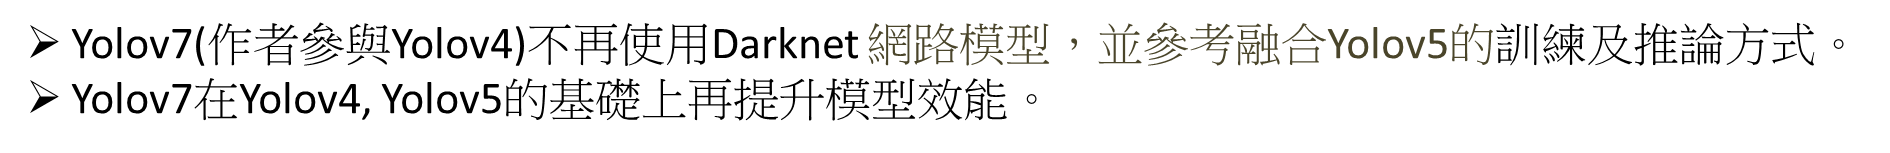

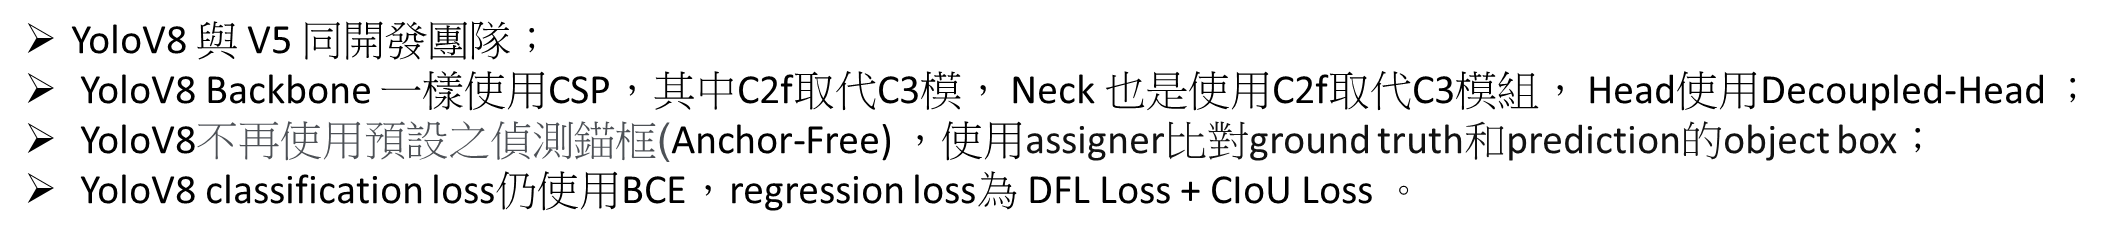

###**Reference:**

###All about yolo:


https://docs.ultralytics.com/quickstart/

https://zhuanlan.zhihu.com/p/599176351

https://zhuanlan.zhihu.com/p/599385089

https://mmyolo.readthedocs.io/zh_CN/latest/recommended_topics/algorithm_descriptions/yolov8_description.html

https://blog.csdn.net/weixin_45977690/article/details/128872473

###Real-time Object Tracking with OpenCV and YOLOv8 in Python

https://www.thepythoncode.com/article/real-time-object-tracking-with-yolov8-opencv

https://github.com/python-dontrepeatyourself/Real-time-Object-Tracking-with-DeepSORT-and-YOLOv8

###Labeling and Makesense:

https://blog.csdn.net/weixin_41010198/article/details/106378404

https://blog.csdn.net/weixin_45192980/article/details/119338209

##**pip install ultralytics**

In [ ]:
!pip install ultralytics==8.0.146

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
# Edit -> Notebook settings -> Hardware accelerator: GPU -> Save
!nvidia-smi

Thu Sep  7 02:49:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/xxtt

52.jpg			 Pills_Detection_0.5.zip     Yolov8.pptx
a.jpg			 pilltest0.3.yaml	     專題進度.xlsx
best.pt			 pilltest.yaml		     專題進度表.ipynb
n.jpg			 ppppyolov8-med-colab.ipynb  履歷.gdoc
Pills_Detection_0.2.zip  tt.jpg			     未命名文件.gdoc
Pills_Detection_0.3.zip  xxtt2.gsheet
Pills_Detection_0.4.zip  y.jpg


In [ ]:
# copy over the dataset into the root directory of the Colab VM

# !cp /content/drive/MyDrive/vocational_training_class/yolo/data/FaceMaskDataset.zip /content
# !cp /content/drive/MyDrive/vocational_training_class/yolo/data/plate.zip /content
# !cp /content/drive/MyDrive/vocational_training_class/yolo/data/appleorange.zip /content
!cp /content/drive/MyDrive/xxtt/Pills_Detection_0.5.zip /content

In [ ]:
# unzip the dataset and the contents so that they are now in /content folder

# !unzip /content/FaceMaskDataset.zip -d /content/
# !unzip /content/plate.zip -d /content/
# !unzip /content/appleorange.zip -d /content/
!unzip /content/Pills_Detection_0.5.zip -d /content/

Archive:  /content/Pills_Detection_0.5.zip
   creating: /content/valid/
   creating: /content/valid/images/
  inflating: /content/valid/images/background (64).jpg  
  inflating: /content/valid/images/background (65).jpg  
  inflating: /content/valid/images/background (66).jpg  
  inflating: /content/valid/images/background (67).jpg  
  inflating: /content/valid/images/background (68).jpg  
  inflating: /content/valid/images/background (69).jpg  
  inflating: /content/valid/images/background (70).jpg  
  inflating: /content/valid/images/background (71).jpg  
  inflating: /content/valid/images/background (72).jpg  
  inflating: /content/valid/images/background (73).jpg  
  inflating: /content/valid/images/background (74).jpg  
  inflating: /content/valid/images/background (75).jpg  
  inflating: /content/valid/images/background (76).jpg  
  inflating: /content/valid/images/background (77).jpg  
  inflating: /content/valid/images/background (78).jpg  
  inflating: /content/valid/images/ba

##**One class**

***建立 plate.yaml***

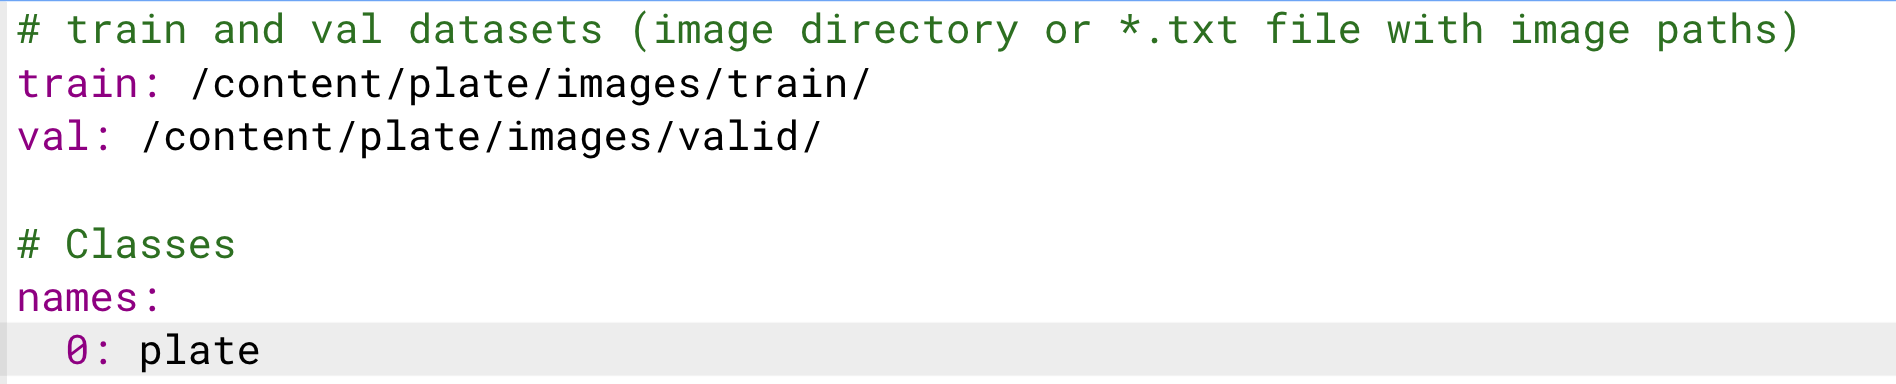



##**Multi-classes**

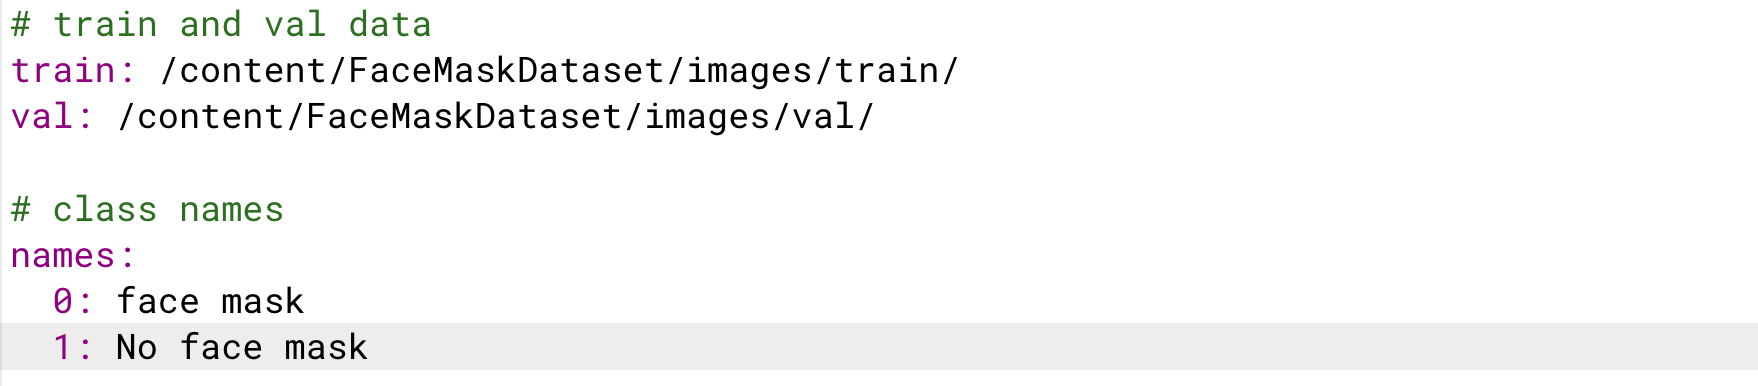

##**train custom data**

In [ ]:
# https://docs.ultralytics.com/usage/cli/
# https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipyn

# data: yaml file to define path to data, classes' names
# model: yolov8x.pt yolov8l.pt yolov8m.pt yolov8s.pt yolov8n.pt
# a full list of train arguments: https://docs.ultralytics.com/usage/cfg/
#

# !yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/vocational_training_class/yolo/yolo_v8/mask.yaml epochs=10 imgsz=256 plots=True
# !yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/vocational_training_class/yolo/yolo_v8/plate.yaml epochs=10 imgsz=256 plots=True
# !yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/vocational_training_class/yolo/yolo_v8/appleorange.yaml epochs=10 imgsz=256 plots=True
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/xxtt/pilltest0.3.yaml epochs=20 imgsz=256 plots=True


New https://pypi.org/project/ultralytics/8.0.172 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/xxtt/pilltest0.3.yaml, epochs=20, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False

In [ ]:
## To save model weights to your google drive!

!cp '/content/runs/detect/train2/weights/best.pt' /content/drive/MyDrive/xxtt
# !cp '/content/runs/detect/train/weights/last.pt' /content/drive/MyDrive/vocational_training_class/yolo/yolo_v8/

In [ ]:
# check training metrics:
# /content/runs/detect/train/results.png
# /content/runs/detect/train/confusion_matrix.png

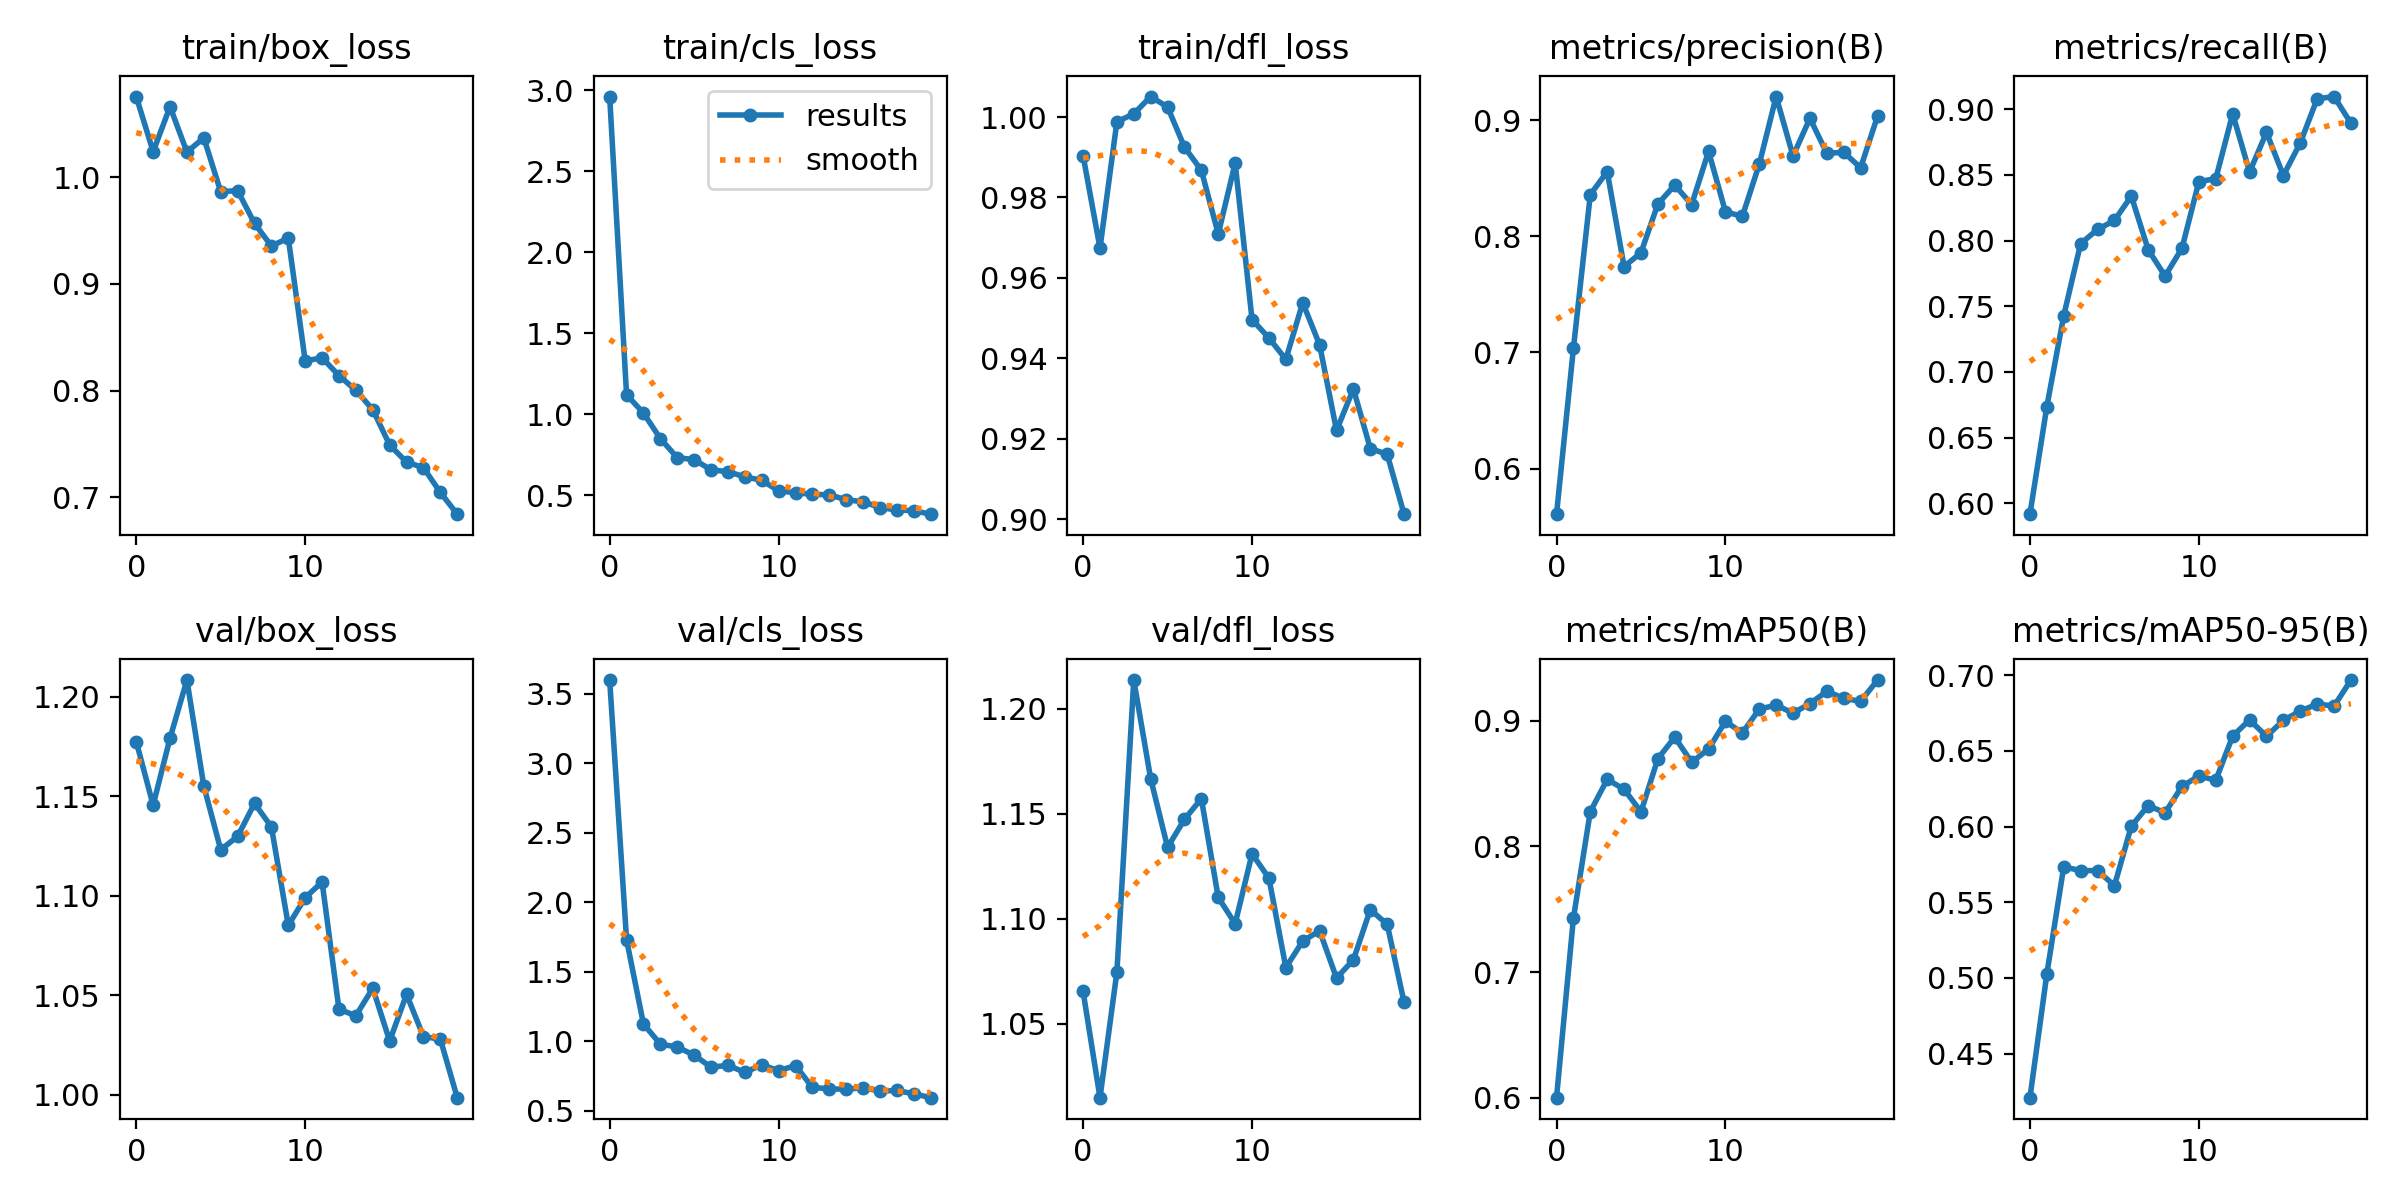

In [ ]:
Image(filename='/content/runs/detect/train2/results.png', width=600)#誤差值

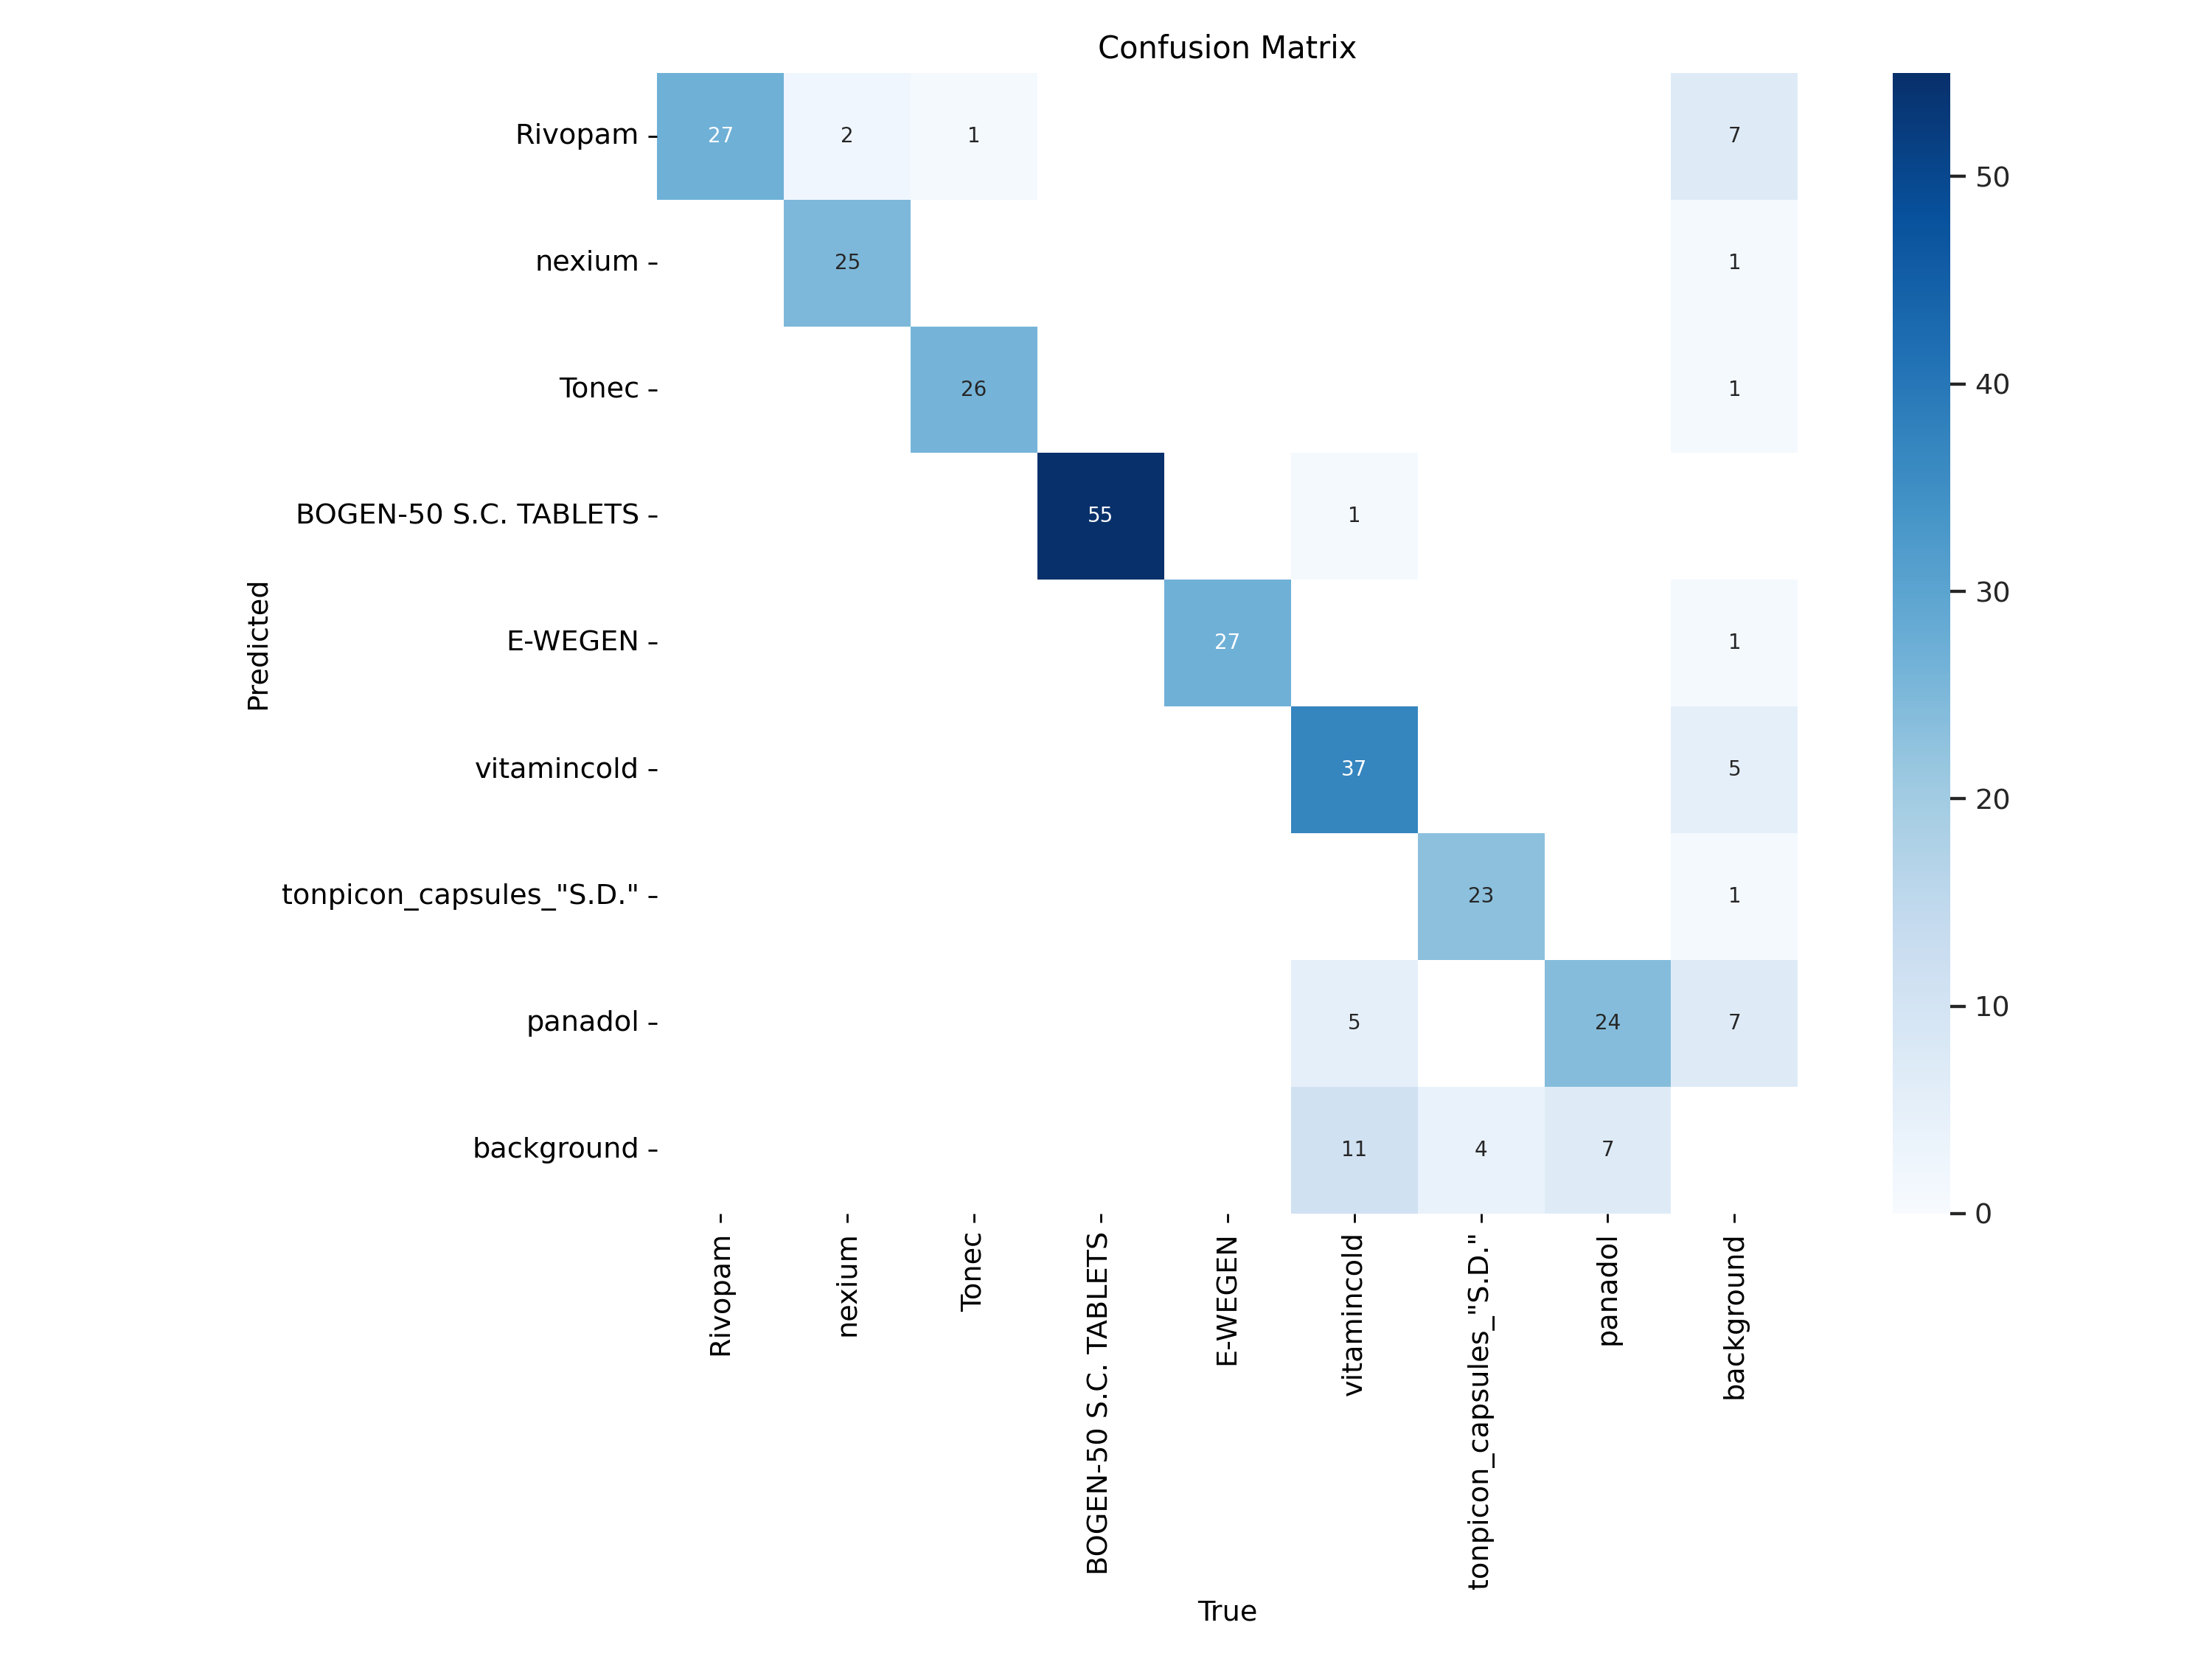

In [ ]:
Image(filename='/content/runs/detect/train2/confusion_matrix.png', width=1000)#準確度

##**inference on test data**

In [ ]:
# 1. CLI Command Line Interface

In [ ]:
# a full list of predict arguments: https://docs.ultralytics.com/usage/cfg/
# 預設 conf=0.25, iou=0.7

# !yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/vocational_training_class/yolo/yolo_v8/mask.jpg save=True
# !yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/vocational_training_class/yolo/yolo_v8/plates.jpg save=True
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/xxtt/a.jpg save=True



Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/xxtt/a.jpg: 256x128 1 nexium, 94.9ms
Speed: 1.3ms preprocess, 94.9ms inference, 107.9ms postprocess per image at shape (1, 3, 256, 128)
Results saved to runs/detect/predict


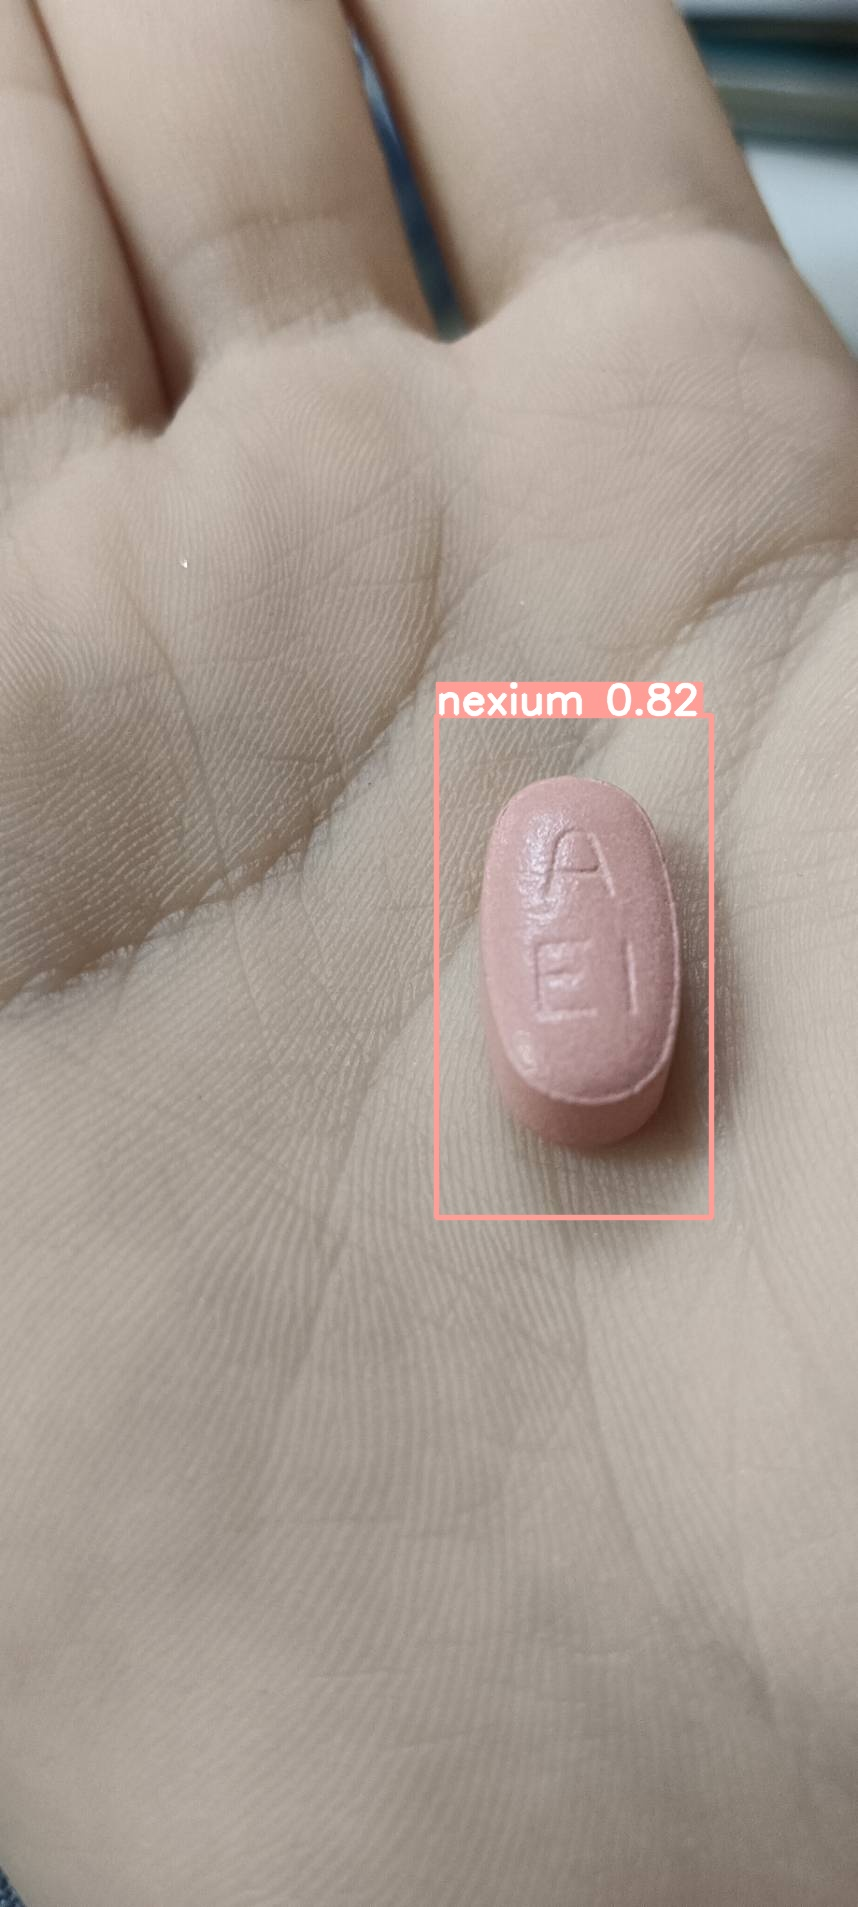

In [ ]:
# display(Image(filename='/content/runs/detect/predict/mask.jpg', width=600))
# display(Image(filename='/content/runs/detect/predict/plates.jpg', width=600))
display(Image(filename='/content/runs/detect/predict/a.jpg', width=600))

In [ ]:
# 2. SDK Software Development Kit

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
# results = model.predict(source='/content/drive/MyDrive/vocational_training_class/yolo/yolo_v8/mask.jpg', conf=0.25)
# results = model.predict(source='/content/drive/MyDrive/vocational_training_class/yolo/yolo_v8/plates.jpg', conf=0.25)
results = model.predict(source='/content/drive/MyDrive/xxtt', conf=0.25)


image 1/3 /content/drive/MyDrive/xxtt/a.jpg: 256x128 1 nexium, 19.1ms
image 2/3 /content/drive/MyDrive/xxtt/n.jpg: 256x256 (no detections), 36.1ms
image 3/3 /content/drive/MyDrive/xxtt/y.jpg: 256x128 1 Rivopam, 26.3ms
Speed: 1.2ms preprocess, 27.2ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 128)


In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model.predict(source='/content/drive/MyDrive/xxtt/a.jpg', conf=0.25)

model.export(format="onnx",imgsz=[416,416], opset=13)  # export the model to ONNX format


image 1/1 /content/drive/MyDrive/xxtt/a.jpg: 256x128 1 nexium, 10.9ms
Speed: 1.1ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 128)
Ultralytics YOLOv8.0.165 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 12, 3549) (21.4 MB)

ONNX: starting export with onnx 1.14.1 opset 13...
ONNX: export success ✅ 2.3s, saved as '/content/runs/detect/train/weights/best.onnx' (42.6 MB)

Export complete (4.7s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=416 
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=416 data=/content/drive/MyDrive/xxtt/pilltest0.3.yaml 
Visualize:       https://netron.app


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'/content/runs/detect/train/weights/best.onnx'

In [ ]:
# detected boxes' coordinates tensors
results[0].boxes.xyxy # [xmin,ymin,xmax,ymax]

tensor([[ 17.1570,  25.9362, 221.5144, 219.7195]], device='cuda:0')

In [ ]:
# detected boxes' coordinates arrays
results[0].boxes.xyxy.detach().cpu().numpy()

array([[     17.157,      25.936,      221.51,      219.72]], dtype=float32)

In [ ]:
# confidence values
results[0].boxes.conf.detach().cpu().numpy()

array([    0.33138], dtype=float32)

In [ ]:
# classes
results[0].boxes.cls.detach().cpu().numpy()

array([          1], dtype=float32)

In [ ]:
# local video path or youtube video link

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/vocational_training_class/yolo/data/appletest.mp4 save=True

Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

video 1/1 (1/240) /content/drive/MyDrive/vocational_training_class/yolo/data/appletest.mp4: 256x160 3 apples, 1 orange, 116.6ms
video 1/1 (2/240) /content/drive/MyDrive/vocational_training_class/yolo/data/appletest.mp4: 256x160 3 apples, 1 orange, 7.6ms
video 1/1 (3/240) /content/drive/MyDrive/vocational_training_class/yolo/data/appletest.mp4: 256x160 4 apples, 1 orange, 8.0ms
video 1/1 (4/240) /content/drive/MyDrive/vocational_training_class/yolo/data/appletest.mp4: 256x160 3 apples, 1 orange, 8.5ms
video 1/1 (5/240) /content/drive/MyDrive/vocational_training_class/yolo/data/appletest.mp4: 256x160 3 apples, 1 orange, 7.9ms
video 1/1 (6/240) /content/drive/MyDrive/vocational_training_class/yolo/data/appletest.mp4: 256x160 3 apples, 1 orange, 9.5ms
video 1/1 (7/240) /content/drive/MyDrive/vocational_training_class/yolo/data/appletes

In [ ]:
!cp /content/runs/detect/predict4/appletest.avi /content/drive/MyDrive/vocational_training_class/yolo/yolo_v8/



---


---



## Exer 1. 使用 plate.zip 及 plate.yaml 訓練偵測模型

## Exer 2. 下載 Apple Orange 二類圖片,訓練偵測模型